In [ ]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [ ]:
# PNS1 Defn

data = LymeData({CHRONIC, NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_PNS1, drop_99=True)
data.drop_one_label(NON_NEURO) # SINGLE LABEL

print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


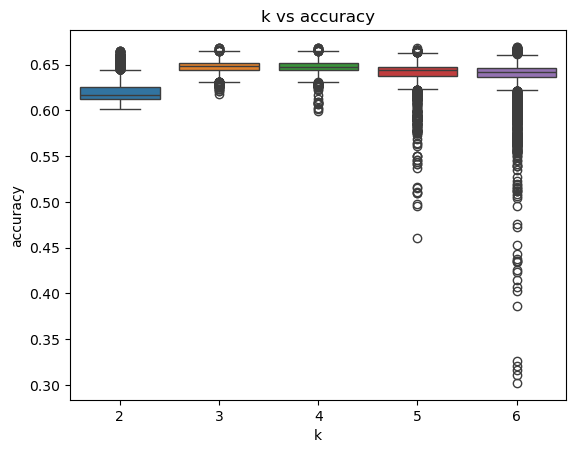

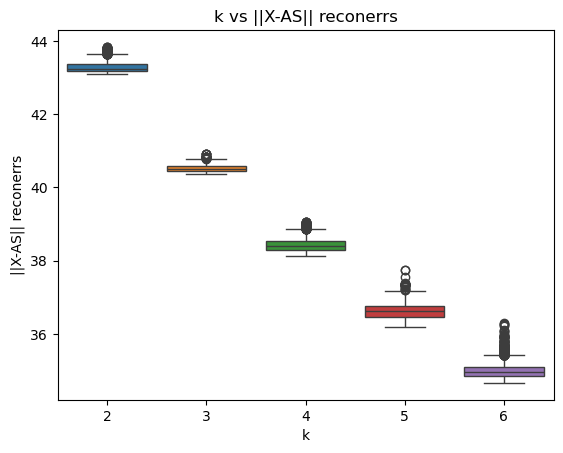

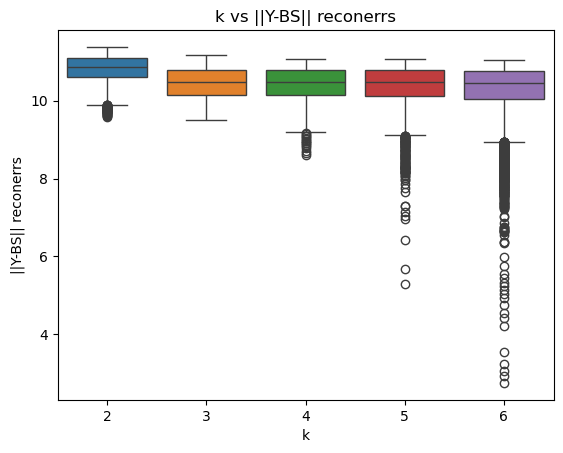

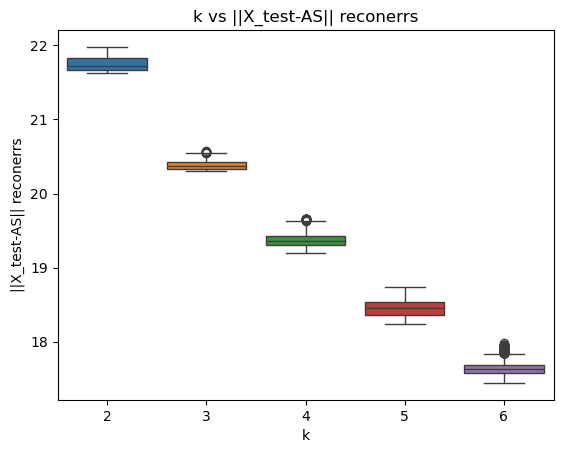

PNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.66951367781155  best params:  {'k': 6, 'lambda': 0.8484848484848485, 'random_state': 68}
test_accuracy:  (0.5681818181818182, 19.39851968599798)


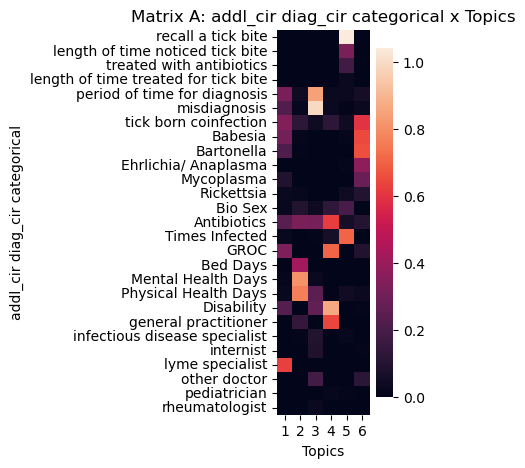

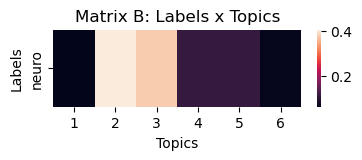

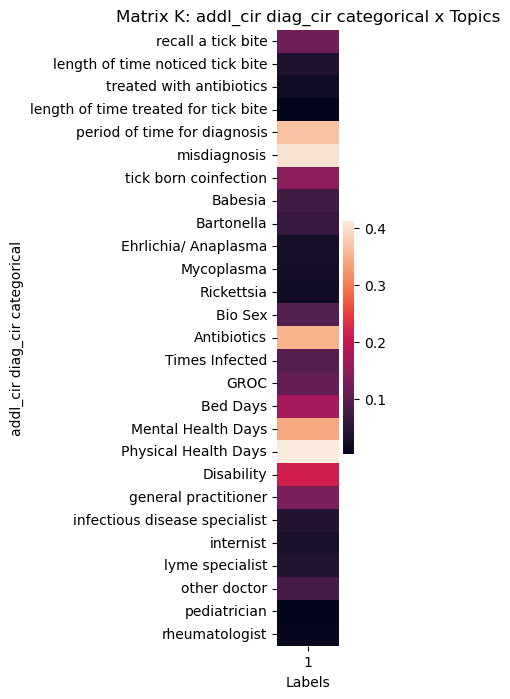

In [9]:

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtestreconerr_distr, ylabel='||X_test-AS|| reconerrs')

print('PNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [10]:
accu_distr.to_csv('PNS1_NvN_Cr_Hs_k2-6_l1_r100_Accu.csv', index=False)
Xreconerr_distr.to_csv('PNS1_NvN_Cr_Hs_k2-6_l1_r100_Xrec.csv', index=False)
Yreconerr_distr.to_csv('PNS1_NvN_Cr_Hs_k2-6_l1_r100_Yrec.csv', index=False)
Xtestreconerr_distr.to_csv('PNS1_NvN_Cr_Hs_k2-6_l1_r100_XCVrec.csv', index=False)

In [11]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2    0.620063
3    0.648291
4    0.648077
5    0.642573
6    0.639777
dtype: float64
IQR:
2    0.012857
3    0.008541
4    0.008561
5    0.009959
6    0.009990
dtype: float64


In [12]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
2    43.278600
3    40.514129
4    38.423815
5    36.615701
6    34.989371
dtype: float64
IQR:
2    0.190629
3    0.138801
4    0.225905
5    0.283803
6    0.221182
dtype: float64


In [13]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    10.823570
3    10.453139
4    10.440981
5    10.402377
6    10.298122
dtype: float64
IQR:
2    0.482605
3    0.658177
4    0.645521
5    0.669457
6    0.727404
dtype: float64


In [14]:
# Yreconerr distribution statistics
mean = Xtestreconerr_distr.mean()
Q1 = Xtestreconerr_distr.quantile(0.25)
Q3 = Xtestreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    21.752153
3    20.382720
4    19.366490
5    18.450457
6    17.634297
dtype: float64
IQR:
2    0.154396
3    0.087335
4    0.132748
5    0.165000
6    0.104961
dtype: float64
